# Problem 1: One die with S sides

### 1. What are the theoretical values of the mean, variance, and standard deviation as functions of S?

> #### Theoretical Mean Value
$ \langle\, x \,\rangle\;= \sum_{x=1}^{S} x \times \frac{1}{S} = \frac{1}{2}S(S+1) \times \frac{1}{S} = \boxed{\frac{1}{2}(S+1)} $
#### Theoretical Variance
$ \sigma^2\;= \langle\, x^2 \,\rangle - {\langle\, x \,\rangle}^2 = \sum_{x=1}^{S} x^2 \times \frac{1}{S} - {\langle\, x \,\rangle}^2 = \frac{1}{6}S(S+1)(2S+1) \times \frac{1}{S} - \left[\frac{1}{2}(S+1)\right]^2 = \boxed{\frac{1}{12}(S^2-1)} $
#### Theoretical Standard Deviation
$ \sigma = \sqrt{\sigma^2} = \boxed{\sqrt{\frac{1}{12}(S^2-1)}} $

## Simulate code

In [10]:
import random
import time
import numpy as np
import pandas as pd
from IPython.display import display
from matplotlib.pyplot import scatter, show, plot, xlabel, ylabel

# create a dicing result based on the chosen trials and sides
def Dice(trials, sides):
    
    histogram = np.zeros(sides)
    
    # choose random integer (faster)
    for r in np.random.randint(sides, size=trials):
        histogram[r] += 1
    
    # # choose random float then convert to int (slower)
    # for t in range(trials):
    #     r = int(np.random.random()*sides)
    #     histogram[r] += 1
    
    return histogram

# calculate the mean, variance, and standard deviation of both experiment and theory
def Calculate(histogram):
    
    sides = histogram.size
    trials = sum(histogram)
    summation = sum((s+1)*times for (s,times) in enumerate(histogram))
    square = sum((s+1)*(s+1)*times for (s,times) in enumerate(histogram))
    
    mean_exp = summation/trials
    var_exp = square/trials - mean_exp*mean_exp
    std_exp = np.sqrt(var_exp)
    mean_thr = (sides+1)/2
    var_thr = (sides*sides-1)/12
    std_thr = np.sqrt(var_thr)
    
    return mean_exp, var_exp, std_exp, mean_thr, var_thr, std_thr

# draw a table of the dicing result
def Draw_Dice(histogram):
    
    sides = histogram.size
    trials = sum(histogram)
    
    content = np.array([histogram, histogram-trials/sides, histogram/trials, histogram/trials-1/sides])
    columns = np.array(["times (N_s)", "times diff. (N_s-N/sides)", "prob. (N_s/N)", "prob. diff. (N_s/N-1/sides)"])
    select_df = pd.DataFrame(np.transpose(content), columns = columns, index = range(1,sides+1))
    display(select_df)

# draw a table of the mean, variance, and standard deviation
def Draw_Calculate(mean_exp, var_exp, std_exp, mean_thr, var_thr, std_thr):
    
    content = np.array([[mean_exp, var_exp, std_exp],
                        [mean_thr, var_thr, std_thr],
                        [mean_exp-mean_thr, var_exp-var_thr, std_exp-std_thr],
                        [(mean_exp-mean_thr)*100/mean_thr, (var_exp-var_thr)*100/var_thr, (std_exp-std_thr)*100/std_thr]])
    columns = np.array(["Experimental Result", "Theoretical Prediction", "Absolute Error", "Relative Error (%)"])
    index = ["Mean Value", "Variance", "Standard Deviation"]
    select_df = pd.DataFrame(np.transpose(content), columns = columns, index = index)
    display(select_df)

# row a dice and print out the result
def OneDieS_np(trials, sides):
    
    c1=time.clock()
    
    print("\n====================")
    print("Number of sides  =", sides)
    print("Number of trials =", trials)

    histogram = Dice(trials, sides)
    Draw_Dice(histogram)
    
    (mean_exp, var_exp, std_exp, mean_thr, var_thr, std_thr) = Calculate(histogram)
    Draw_Calculate(mean_exp, var_exp, std_exp, mean_thr, var_thr, std_thr)
    
    c2=time.clock()
    print("\nElapsed time =", c2-c1)

# obtain an error
def GetError(trials, sides, target):

    histogram= Dice(trials, sides)
    (mean_exp, var_exp, std_exp, mean_thr, var_thr, std_thr) = Calculate(histogram)
    
    if (target == "mean"):
        return abs((mean_exp-mean_thr)*100/mean_thr)
    elif (target == "std"):
        return abs((std_exp-std_thr)*100/std_thr)

def Error2Trails(sides, lowlim, uplim, spacing, repeat):
    
    c1=time.clock()
    print("\n====================")
    print("Number of sides  =", sides)
    
    target_list = np.array(["mean", "std"])
    color_list = np.array(["orange", "blue"])
    
    print("\nPredict Elapsed time =", repeat*(uplim-lowlim)*(uplim-lowlim)/(spacing*1000000), "\n")
    
    X = list(range(lowlim, uplim, spacing))*repeat
    for (target,color) in zip(target_list,color_list):
        
        print(target, "displayed in", color)
        
        Y = []
        for x in X:
            Y.append(GetError(x, sides, target))

        scatter(X,Y, alpha=.2, color=color)
    
    xlabel('number of trails')
    ylabel('relative error (%)')
    plot([X[0],X[-1]], [1,1], color="pink")
    show()
    
    c2=time.clock()
    print("\nElapsed time =", c2-c1)
    
def ErrorRatio2Trails(sides, lowlim, uplim, spacing, repeat, rounds, errthreshold):
    
    c1=time.clock()
    print("\n====================")
    print("Number of sides  =", sides)
    
    target_list = np.array(["mean", "std"])
    color_list = np.array(["orange", "blue"])
    
    print("\nPredict Elapsed time =", repeat*rounds*(uplim-lowlim)*(uplim-lowlim)/(spacing*1000000))
    
    X = list(range(lowlim, uplim, spacing))*repeat
    for (target,color) in zip(target_list,color_list):
        
        print(target, "displayed in", color)
        
        Y = []
        for x in X:
            cnt = 0
            for i in range(rounds):
                if GetError(x, sides, target) <= errthreshold:
                    cnt += 1
            Y.append(cnt/rounds)

        scatter(X,Y, alpha=.2, color=color)
    
    xlabel('number of trails')
    ylabel('ratio of error < '+str(errthreshold)+'%')
    show()
    
    c2=time.clock()
    print("\nElapsed time =", c2-c1)

### 2-1. Simulate rolling a die with S sides <br /> 2-2. Print out the mean, variance, and standard deviation for a number of trials <br /> 2-3. Print out the theoretical predictions in each case, as well as the deviations from theory
> See `OneDieS_np(1000000, 8)` : rolling a die with $S = 8$ sides $1000000$ times

In [2]:
OneDieS_np(1000000, 8)


Number of sides  = 8
Number of trials = 1000000


,times (N_s),times diff. (N_s-N/sides),prob. (N_s/N),prob. diff. (N_s/N-1/sides)
1,124920.0,-80.0,0.124920,-0.000080
2,125131.0,131.0,0.125131,0.000131
3,124916.0,-84.0,0.124916,-0.000084
4,125569.0,569.0,0.125569,0.000569
5,124671.0,-329.0,0.124671,-0.000329
6,124995.0,-5.0,0.124995,-0.000005
7,124692.0,-308.0,0.124692,-0.000308
8,125106.0,106.0,0.125106,0.000106


,Experimental Result,Theoretical Prediction,Absolute Error,Relative Error (%)
Mean Value,4.499223,4.500000,-0.000777,-0.017267
Variance,5.249071,5.250000,-0.000929,-0.017688
Standard Deviation,2.291085,2.291288,-0.000203,-0.008844



Elapsed time = 0.8968590000000001


### 3. Run your program for two different values of S
> rolling a die $1000000$ times <br/><br/>
`OneDieS_np(1000000, 6)` : die with $S = 6$ sides <br/>
`OneDieS_np(1000000, 8)` : die with $S = 8$ sides

In [3]:
OneDieS_np(1000000, 6)
OneDieS_np(1000000, 8)


Number of sides  = 6
Number of trials = 1000000


,times (N_s),times diff. (N_s-N/sides),prob. (N_s/N),prob. diff. (N_s/N-1/sides)
1,166597.0,-69.666667,0.166597,-0.000070
2,166486.0,-180.666667,0.166486,-0.000181
3,166650.0,-16.666667,0.166650,-0.000017
4,166852.0,185.333333,0.166852,0.000185
5,166681.0,14.333333,0.166681,0.000014
6,166734.0,67.333333,0.166734,0.000067


,Experimental Result,Theoretical Prediction,Absolute Error,Relative Error (%)
Mean Value,3.500736,3.500000,0.000736,0.021029
Variance,2.916319,2.916667,-0.000347,-0.011904
Standard Deviation,1.707723,1.707825,-0.000102,-0.005952



Elapsed time = 0.9294149999999997

Number of sides  = 8
Number of trials = 1000000


,times (N_s),times diff. (N_s-N/sides),prob. (N_s/N),prob. diff. (N_s/N-1/sides)
1,124826.0,-174.0,0.124826,-0.000174
2,124934.0,-66.0,0.124934,-0.000066
3,125191.0,191.0,0.125191,0.000191
4,124753.0,-247.0,0.124753,-0.000247
5,125197.0,197.0,0.125197,0.000197
6,124864.0,-136.0,0.124864,-0.000136
7,125448.0,448.0,0.125448,0.000448
8,124787.0,-213.0,0.124787,-0.000213


,Experimental Result,Theoretical Prediction,Absolute Error,Relative Error (%)
Mean Value,4.500880,4.500000,0.000880,0.019556
Variance,5.247757,5.250000,-0.002243,-0.042720
Standard Deviation,2.290798,2.291288,-0.000489,-0.021362



Elapsed time = 0.8982029999999996


### 4-1. Experiment with different numbers of trials.

> rolling a die with $S = 8$ sides <br/><br/>
`OneDieS_np(100, 8)` : $100$ times <br/>
`OneDieS_np(10000, 8)` : $10000$ times <br/>
`OneDieS_np(1000000, 8)` : $1000000$ times <br/>

In [4]:
OneDieS_np(100, 8)
OneDieS_np(10000, 8)
OneDieS_np(1000000, 8)


Number of sides  = 8
Number of trials = 100


,times (N_s),times diff. (N_s-N/sides),prob. (N_s/N),prob. diff. (N_s/N-1/sides)
1,12.0,-0.5,0.12,-0.005
2,11.0,-1.5,0.11,-0.015
3,8.0,-4.5,0.08,-0.045
4,11.0,-1.5,0.11,-0.015
5,14.0,1.5,0.14,0.015
6,10.0,-2.5,0.10,-0.025
7,15.0,2.5,0.15,0.025
8,19.0,6.5,0.19,0.065


,Experimental Result,Theoretical Prediction,Absolute Error,Relative Error (%)
Mean Value,4.890000,4.500000,0.390000,8.666667
Variance,5.737900,5.250000,0.487900,9.293333
Standard Deviation,2.395391,2.291288,0.104104,4.543452



Elapsed time = 0.04918800000000001

Number of sides  = 8
Number of trials = 10000


,times (N_s),times diff. (N_s-N/sides),prob. (N_s/N),prob. diff. (N_s/N-1/sides)
1,1233.0,-17.0,0.1233,-0.0017
2,1273.0,23.0,0.1273,0.0023
3,1216.0,-34.0,0.1216,-0.0034
4,1299.0,49.0,0.1299,0.0049
5,1302.0,52.0,0.1302,0.0052
6,1202.0,-48.0,0.1202,-0.0048
7,1224.0,-26.0,0.1224,-0.0026
8,1251.0,1.0,0.1251,0.0001


,Experimental Result,Theoretical Prediction,Absolute Error,Relative Error (%)
Mean Value,4.492100,4.500000,-0.007900,-0.175556
Variance,5.212538,5.250000,-0.037462,-0.713570
Standard Deviation,2.283098,2.291288,-0.008190,-0.357424



Elapsed time = 0.052711000000000396

Number of sides  = 8
Number of trials = 1000000


,times (N_s),times diff. (N_s-N/sides),prob. (N_s/N),prob. diff. (N_s/N-1/sides)
1,124262.0,-738.0,0.124262,-0.000738
2,124896.0,-104.0,0.124896,-0.000104
3,125402.0,402.0,0.125402,0.000402
4,125154.0,154.0,0.125154,0.000154
5,124986.0,-14.0,0.124986,-0.000014
6,125314.0,314.0,0.125314,0.000314
7,124960.0,-40.0,0.124960,-0.000040
8,125026.0,26.0,0.125026,0.000026


,Experimental Result,Theoretical Prediction,Absolute Error,Relative Error (%)
Mean Value,4.502618,4.500000,0.002618,0.058178
Variance,5.242017,5.250000,-0.007983,-0.152054
Standard Deviation,2.289545,2.291288,-0.001743,-0.076056



Elapsed time = 1.0607620000000004


### 4-2. How many trials do you need to obtain a rough estimate for the values of the mean and standard deviation?

> If we say that "rough"means "10% accuracy", then for a die with 8 sides,<br/> we need __about 100 trials__ to obtain a rough estimate for the values of the mean and standard deviation.


Number of sides  = 8

Predict Elapsed time = 0.22201
mean displayed in orange
std displayed in blue


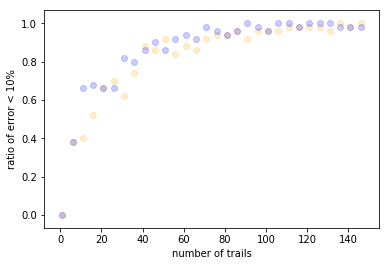


Elapsed time = 0.6325129999999604


In [26]:
lowlim       = 1 # lower limit of trails
uplim        = 150 # upper limit of trails
spacing      = 5 # spacing of trails
repeat       = 1 # repeat how many times
rounds       = 50 # how many rounds to make an average error
errthreshold = 10 # x% accuracy to obtain

ErrorRatio2Trails(8, lowlim, uplim, spacing, repeat, rounds, errthreshold)

### 4-3. How many trials do you need to obtain an error of less than 1%?

> For a die with 8 sides,<br/> we need __about 10000 trials__ to obtain a rough estimate for the values of the mean and standard deviation.


Number of sides  = 8

Predict Elapsed time = 75.0
mean displayed in orange
std displayed in blue


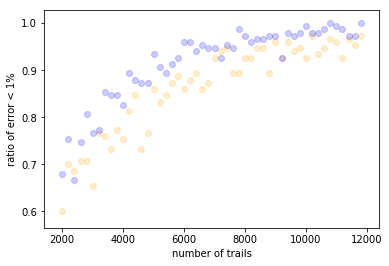


Elapsed time = 127.45786599999997


In [29]:
lowlim       = 2000 # lower limit of trails
uplim        = 12000 # upper limit of trails
spacing      = 200 # spacing of trails
repeat       = 1 # repeat how many times
rounds       = 150 # how many rounds to make an average error
errthreshold = 1 # x% accuracy to obtain

ErrorRatio2Trails(8, lowlim, uplim, spacing, repeat, rounds, errthreshold)

### 4-4. Do you need the same number of trials to obtain 1% accuracy for the mean and standard deviation?
> No, they are __NOT__ the same. We need more number of trials for mean than for standard deviation. 

> Furthermore, as we can see in the following, the trend of the seperation between the number of trials needed for mean and for standard deviation is more obvious as the number of sides increases.


Number of sides  = 8

Predict Elapsed time = 60.75
mean displayed in orange
std displayed in blue


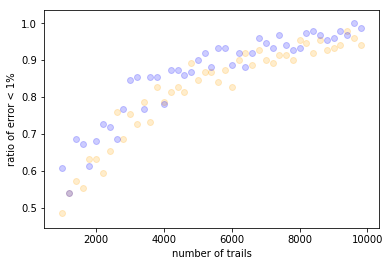


Elapsed time = 72.84187299999999

Number of sides  = 50

Predict Elapsed time = 60.75
mean displayed in orange
std displayed in blue


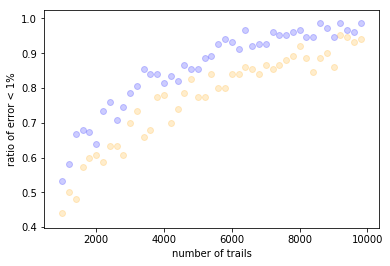


Elapsed time = 70.565368

Number of sides  = 120

Predict Elapsed time = 60.75
mean displayed in orange
std displayed in blue


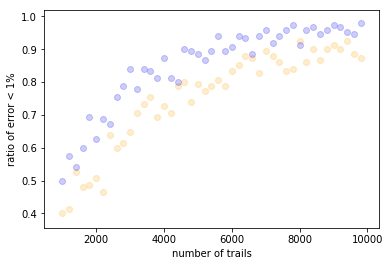


Elapsed time = 69.653291


In [11]:
lowlim       = 1000 # lower limit of trails
uplim        = 10000 # upper limit of trails
spacing      = 200 # spacing of trails
repeat       = 1 # repeat how many times
rounds       = 150 # how many rounds to make an average error
errthreshold = 1 # x% accuracy to obtain

ErrorRatio2Trails(8, lowlim, uplim, spacing, repeat, rounds, errthreshold)
ErrorRatio2Trails(50, lowlim, uplim, spacing, repeat, rounds, errthreshold)
ErrorRatio2Trails(120, lowlim, uplim, spacing, repeat, rounds, errthreshold)

***
# Test Area


Number of sides  = 6

Predict Elapsed time = 0.89401 

mean displayed in orange
std displayed in blue


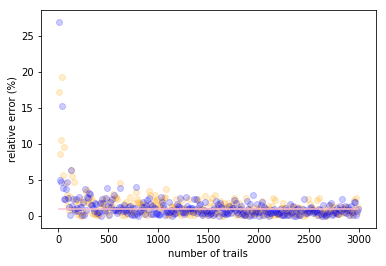


Elapsed time = 1.1700560000003861

Number of sides  = 10

Predict Elapsed time = 0.89401 

mean displayed in orange
std displayed in blue


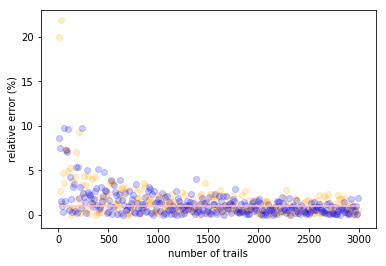


Elapsed time = 1.1177739999998266


In [631]:
lowlim  = 10     # lower limit of trails
uplim   = 3000   # upper limit of trails
spacing = 10     # spacing of trails
repeat  = 1       # repeat how many times

Error2Trails(6, lowlim, uplim, spacing, repeat)
Error2Trails(10, lowlim, uplim, spacing, repeat)


Number of sides  = 6

Predict Elapsed time = 0.9801 

mean displayed in orange
std displayed in blue


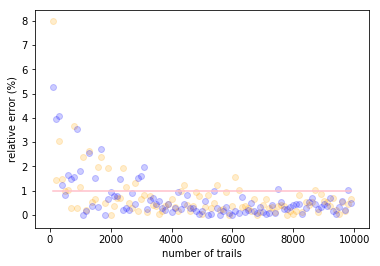


Elapsed time = 1.1673960000002808


In [632]:
lowlim  = 100     # lower limit of trails
uplim   = 10000   # upper limit of trails
spacing = 100     # spacing of trails
repeat  = 1       # repeat how many times

Error2Trails(6, lowlim, uplim, spacing, repeat)

In [605]:
trail = 1000
test  = 10
sides = 12

for i in range(test):
    print (GetError(trail, sides, "mean"))

0.014307692307692303
0.00784615384615387
0.0015384615384615057
0.019846153846153777
0.00046153846153847904
0.016615384615384563
0.006307692307692365
0.030307692307692317
0.004153846153846175
0.034000000000000016
